# Philadelphia Bike Share Analysis 
This notebook analyzes Indego Bike Share usage in Phialadelphia from the launch of the service (April 2015) through 2017Q2. It primarily looks at the difference in usage between the Monthly membership riders (Indego30) and standard walk-up riders.

The data used for this analysis can be found here: https://www.rideindego.com/about/data/

Info about the different types of passes and their pricing for the service can be found here: https://www.rideindego.com/passes/

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()

from packages.data import get_bike_data
from packages.daylight import hours_of_daylight

In [2]:
data = get_bike_data()

#creates date and hour columns
ind = pd.DatetimeIndex(data.start_time)
data['date'] = ind.date.astype('datetime64')
data['hour'] = ind.hour

#dropping the 'One Day Pass' riders since there are only a few riders of that type in the whole dataset
data = data[data['passholder_type'] != 'One Day Pass']


,trip_id,duration,start_time,end_time,start_station_id,start_lat,start_lon,end_station_id,end_lat,end_lon,...,passholder_type,start_station_name,start_active_date,start_status,end_station_name,end_active_date,end_status,count,date,hour
start_time,,,,,,,,,,,,,,,,,,,,,
2015-04-23 07:44:00,4001912,1.0,2015-04-23 07:44:00,2015-04-23 07:45:00,3046.0,39.9501,-75.1447,3046,39.9501,-75.1447,...,Indego30,2nd & Market,2015-04-23,Active,2nd & Market,2015-04-23,Active,1,2015-04-23,7
2015-04-23 07:45:00,4001916,1.0,2015-04-23 07:45:00,2015-04-23 07:46:00,3046.0,39.9501,-75.1447,3046,39.9501,-75.1447,...,Indego30,2nd & Market,2015-04-23,Active,2nd & Market,2015-04-23,Active,1,2015-04-23,7
2015-04-23 13:12:00,4002128,29.0,2015-04-23 13:12:00,2015-04-23 13:41:00,3046.0,39.9501,-75.1447,3046,39.9501,-75.1447,...,Indego30,2nd & Market,2015-04-23,Active,2nd & Market,2015-04-23,Active,1,2015-04-23,13
2015-04-23 14:54:00,4002255,23.0,2015-04-23 14:54:00,2015-04-23 15:17:00,3046.0,39.9501,-75.1447,3046,39.9501,-75.1447,...,Walk-up,2nd & Market,2015-04-23,Active,2nd & Market,2015-04-23,Active,1,2015-04-23,14
2015-04-23 16:31:00,4002342,1.0,2015-04-23 16:31:00,2015-04-23 16:32:00,3046.0,39.9501,-75.1447,3046,39.9501,-75.1447,...,Indego30,2nd & Market,2015-04-23,Active,2nd & Market,2015-04-23,Active,1,2015-04-23,16


On Indego's website there is nothing about One Day Passes and there are very few records in the dataset so I dropped them from the data.

### Bike Share Use Over Time

In [25]:
#creates pivot table with date and rider type
by_date = data.pivot_table('trip_id', aggfunc='count',
                            index='date',
                            columns='passholder_type')

#resamples the pivot table by week
by_week =  by_date.resample('w').sum()  

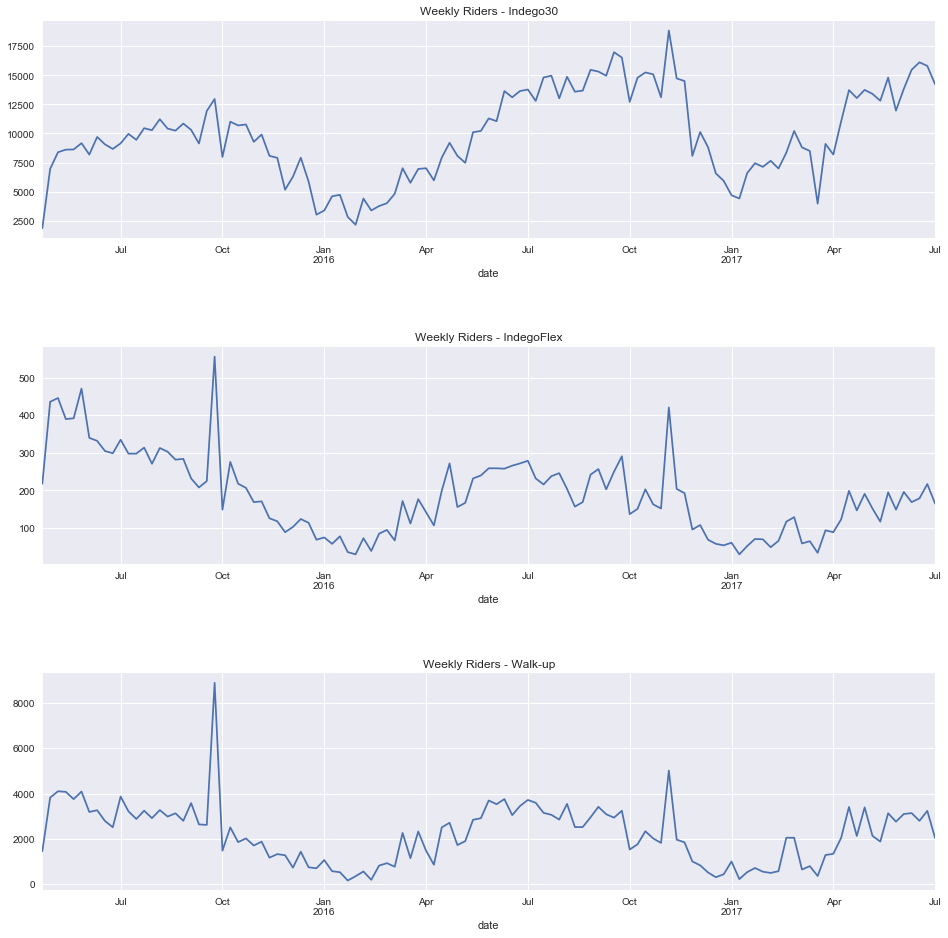

In [29]:
#plots the Daily rider counts by rider type

fig, ax = plt.subplots(3, figsize=(16, 16))
fig.subplots_adjust(hspace=.5)
by_week.iloc[:, 0].plot(ax=ax[0], title='Weekly Riders - Indego30');
by_week.iloc[:, 1].plot(ax=ax[1], title='Weekly Riders - IndegoFlex');
by_week.iloc[:, 2].plot(ax=ax[2], title='Weekly Riders - Walk-up');

- As expected there is higher use in warmer months compared to colder ones. Though, I wasn't expecting to see a higher share of use with Indego30 riders compared to walk-up riders.
- The sharp increase in Fall 2015 is from the week the Pope visited Philadelphia. Car traffic in the city was haulted for a few days leaving empty streets for cyclists to ride in.
- Slight increase in Fall 2016 is from the SEPTA worker strike, which shutdown public transportation for ~1 week



### Bike Share Use by Day of the Week

In [30]:
#groups the pivot table above by day of the week and year
by_weekday = by_date.groupby([by_date.index.year, by_date.index.dayofweek]).mean()

# remove label for plot
by_weekday.columns.name = None  

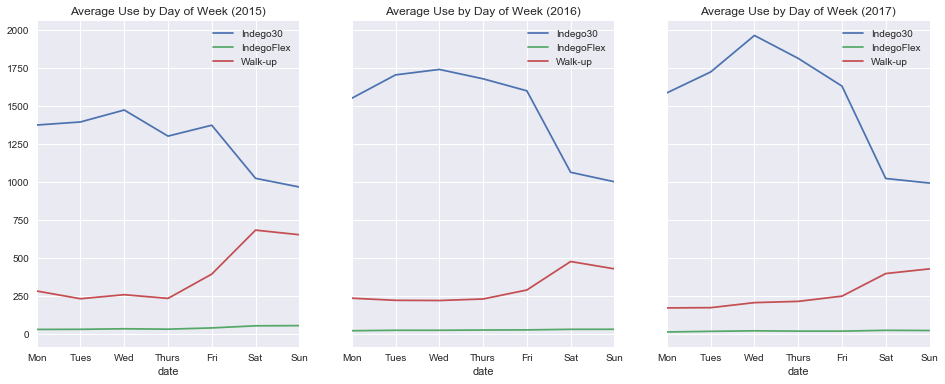

In [31]:
#plots the average rider count for each day of the week
fig, ax = plt.subplots(1, 3, figsize=(16, 6), sharey=True)
by_weekday.loc[2015].plot(title='Average Use by Day of Week (2015)', ax=ax[0]);
by_weekday.loc[2016].plot(title='Average Use by Day of Week (2016)', ax=ax[1]);
by_weekday.loc[2017].plot(title='Average Use by Day of Week (2017)', ax=ax[2]);
for axi in ax:
    axi.set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])

- The monthly-member riders show higher use on weekdays compared to weekends. This suggests that these riders use the service more for commuting compared to walk-up riders who ride more on the weekends.
- Monnthly-member use has increased year-over-year, whereas walk-up use has slightly decreased
    - Possibly due to the pricing of the Indego30 pass being more favorable than walk-up pricing
    
Note: Due to the small volume in IndegoFlex ridership, I will remove them from further analysis


In [43]:
data = data[data['passholder_type'] != 'IndegoFlex']

Now let's look at the ride use by hour to see if there are any trends there.

In [44]:
#creates a dataset that groups the riders counts by weekend/weekday and hour of the day 

# count trips by date and by hour
by_hour = data.pivot_table('trip_id', aggfunc='count',
                            index=['date', 'hour'],
                            columns='passholder_type').fillna(0).reset_index('hour')

# average these counts by weekend
by_hour['weekend'] = (by_hour.index.dayofweek >= 5)
by_hour = by_hour.groupby(['weekend', 'hour']).mean()
by_hour.index.set_levels([['weekday', 'weekend'],
                          ["{0}:00".format(i) for i in range(24)]],
                         inplace=True);
by_hour.columns.name = None

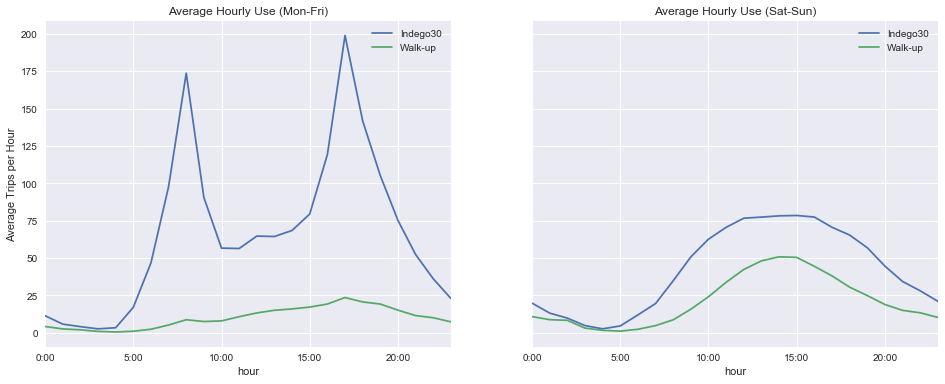

In [45]:
#plots the average rider count by hour of the day for weekdays and weekends
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
by_hour.loc['weekday'].plot(title='Average Hourly Use (Mon-Fri)', ax=ax[0]);
by_hour.loc['weekend'].plot(title='Average Hourly Use (Sat-Sun)', ax=ax[1]);
ax[0].set_ylabel('Average Trips per Hour');

- There is a clear 'commute' pattern for Indego30 rider on weekdays with sharp peaks in the morning and evening.
- Weekend ridership shows a 'recreational' pattern with a broad peak throughout the afternoon


### Trip Durations by Rider Type

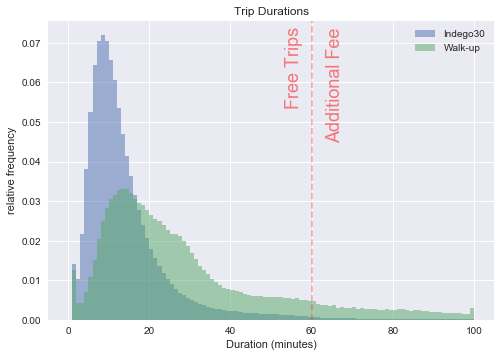

In [35]:
#plots and compares the distribution of the ride durations for Indego30 and Walk-up riders

#dropping IndegoFlex riders because of small volume
data[data['passholder_type'] != 'IndegoFlex'].groupby('passholder_type')['duration'].hist(bins=np.arange(101),
                                                                                          alpha=0.5, normed=True);
plt.xlabel('Duration (minutes)')
plt.ylabel('relative frequency')
plt.title('Trip Durations')
plt.legend(['Indego30', 'Walk-up'])

#Adds a line for the 60 min free time that Indego30 riders get with their membership 
plt.text(68, 0.06, "Free Trips\n\nAdditional Fee", ha='right',
         size=18, rotation=90, alpha=0.5, color='red')
plt.axvline(60, linestyle='--', color='red', alpha=0.3);

In [53]:
#percent of Indego30 riders who go over the free 60 minutes
(len(data[(data['passholder_type'] == 'Indego30') & (data['duration'] > 60)]) / len(data)) * 100

1.8441390244656206

- Indego30 riders are good about not going over the free 60 minute mark, with only 1.84% going over 1 hour
- Walk-up riders are more likely to ride for extended periods of time

In [37]:
#Reads the weather data
weather = pd.read_csv('phlweather.csv', index_col='DATE', parse_dates=True, usecols=[2, 3, 4, 8, 9, 10])
#drops the dates after 2017Q2 that we don't need
weather = weather[:'2017-06-30']

In [40]:
#adds the weather data to the daily dataset
by_date = data.groupby(['date', 'passholder_type'])['trip_id'].count()
by_date.name = 'count'
by_date = by_date.reset_index('passholder_type').join(weather)
by_date.head()

,passholder_type,count,AWND,PRCP,TAVG,TMAX,TMIN
2015-04-23,Indego30,294,15.21,0.0,49.0,52.0,43.0
2015-04-23,IndegoFlex,23,15.21,0.0,49.0,52.0,43.0
2015-04-23,Walk-up,82,15.21,0.0,49.0,52.0,43.0
2015-04-24,Indego30,446,16.55,0.0,47.0,57.0,39.0
2015-04-24,IndegoFlex,46,16.55,0.0,47.0,57.0,39.0


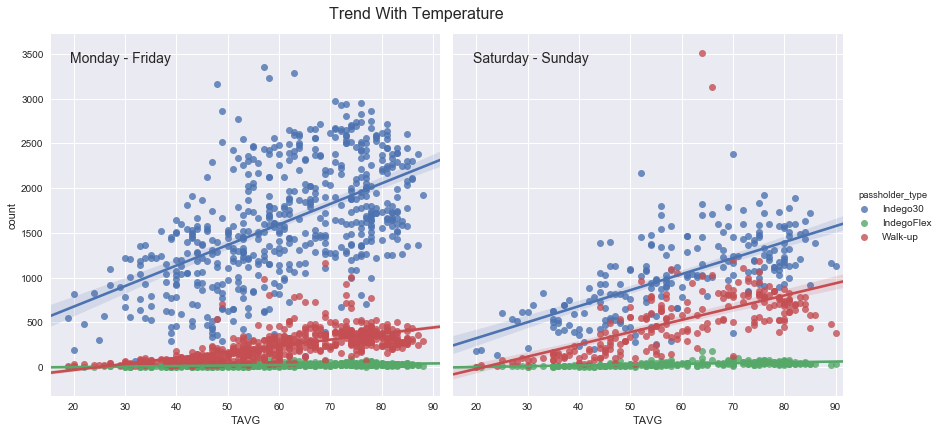

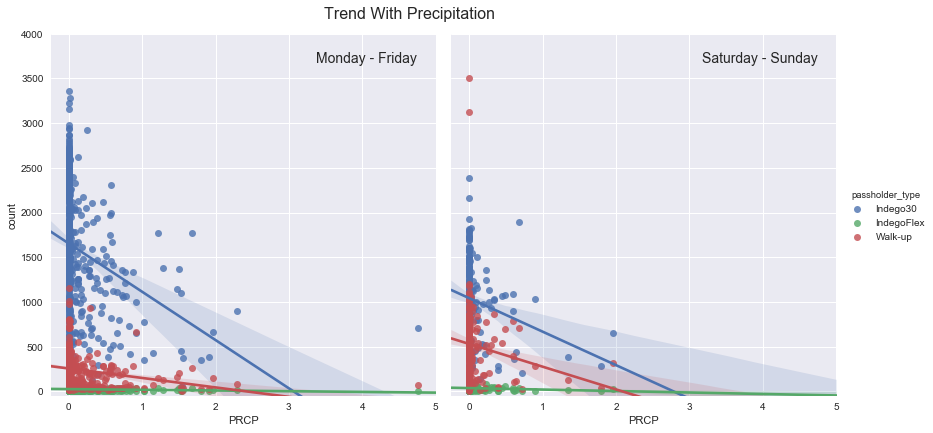

In [41]:
# add a flag indicating weekend
by_date['weekend'] = (by_date.index.dayofweek >= 5)

# Plot Temperature Trend
g = sns.FacetGrid(by_date, col="weekend", hue='passholder_type', size=6)
g.map(sns.regplot, "TAVG", "count")
g.add_legend();

#formatting
g.axes[0, 0].set_title('')
g.axes[0, 1].set_title('')
g.axes[0, 0].text(0.05, 0.95, 'Monday - Friday', va='top', size=14,
                  transform=g.axes[0, 0].transAxes)
g.axes[0, 1].text(0.05, 0.95, 'Saturday - Sunday', va='top', size=14,
                  transform=g.axes[0, 1].transAxes)
g.fig.text(0.45, 1, "Trend With Temperature", ha='center', va='top', size=16);


# Plot Precipitation
g = sns.FacetGrid(by_date, col="weekend", hue='passholder_type', size=6)
g.map(sns.regplot, "PRCP", "count")
g.add_legend();

#formatting
g.axes[0, 0].set_ylim(-50, 4000);
g.axes[0, 0].set_title('')
g.axes[0, 1].set_title('')
g.axes[0, 0].text(0.95, 0.95, 'Monday - Friday', ha='right', va='top', size=14,
                  transform=g.axes[0, 0].transAxes)
g.axes[0, 1].text(0.95, 0.95, 'Saturday - Sunday', ha='right', va='top', size=14,
                  transform=g.axes[0, 1].transAxes)
g.fig.text(0.45, 1, "Trend With Precipitation", ha='center', va='top', size=16);